# 2D Coalescent Hitting Times

In [1]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import fenics as fx
import product_fem as pf
from IPython.display import Video
import pickle

### optimization

In [2]:
n = 7
mesh = fx.UnitSquareMesh(n-1, n-1)
V = fx.FunctionSpace(mesh, 'CG', 1)
coords = V.tabulate_dof_coordinates()
W = pf.ProductFunctionSpace(V)

eqn = pf.HittingTimes(W, u_bdy=0.5, epsilon=1e-2)
mu, sig = m = eqn.control

mu_func = lambda x, y: [np.exp(-x+y) + np.sin(y*2*np.pi), 
                        np.exp(x-y) + np.cos(x*2*np.pi)]
mu.assign(pf.to_Function(mu_func, mu.function_space()))
m.update([mu, sig])

data = eqn.solve(m)
reg = {'l2': [1e-6, 1e-6], 'smoothing': [1e-5, 1e-4]}
loss = pf.LossFunctional(data, m, reg)
invp = pf.InverseProblem(eqn, loss)

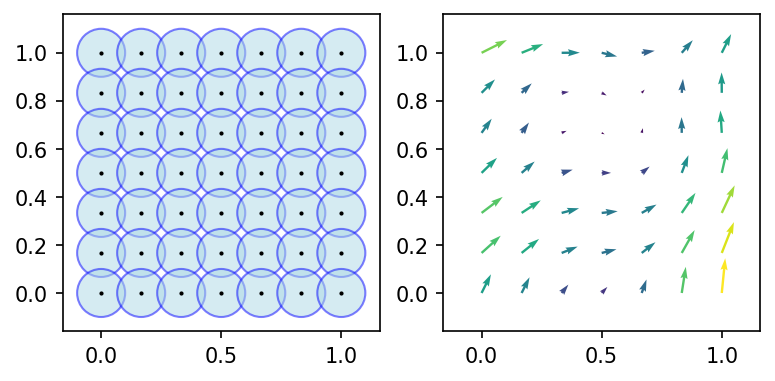

In [3]:
eqn.plot_control()

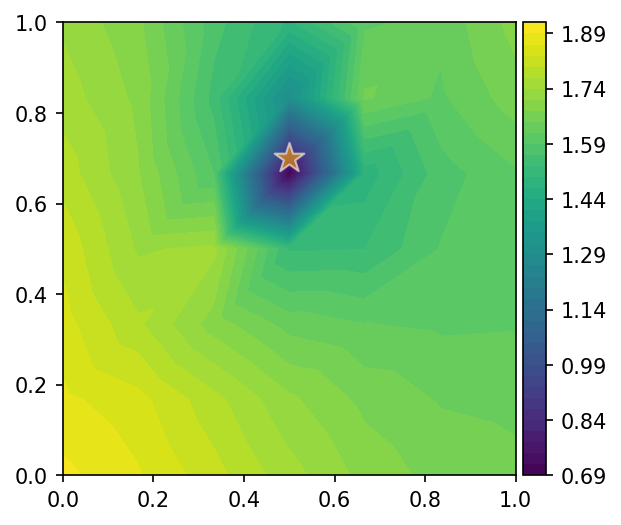

In [4]:
data.plot([0.5, 0.7])

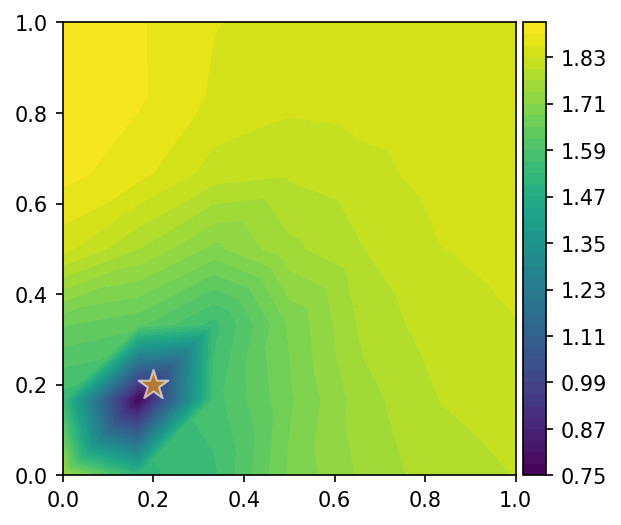

In [5]:
data.plot([0.2, 0.2])

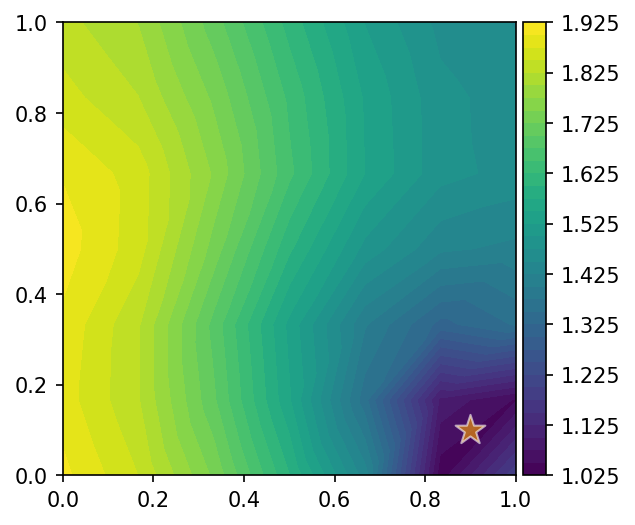

In [6]:
data.plot([0.9, 0.1])

In [7]:
mu_true, sig_true = m.split_arrays()
print('loss at truth:', invp.compute_loss(m))
# m.update([np.zeros(len(mu_true)), sig_true])
m.update([np.random.randn(len(mu_true)), 
          sig_true + 0.5 * np.random.randn(len(sig_true))])
print('loss at guess:', invp.compute_loss(m)) 

loss at truth: 0.00022214216720424203
loss at guess: 0.7488792412411389


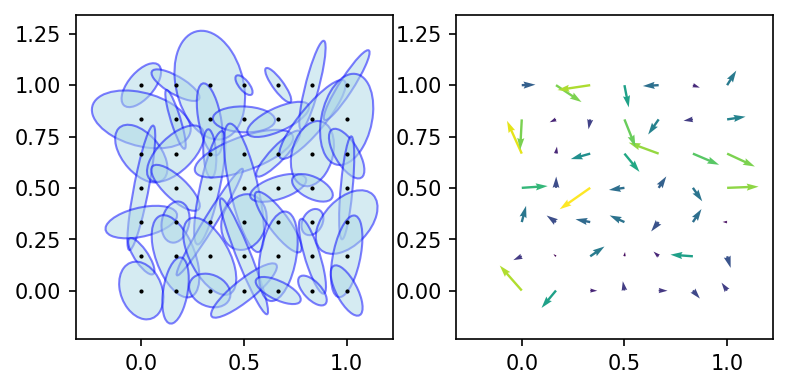

In [8]:
eqn.plot_control() # initial guess

In [9]:
# previous model fit results saved

# with open('convergence_results.pkl', 'rb') as f:
#     m_hats = pickle.load(f)

In [ ]:
options = {'ftol': 1e-9, 'gtol': 1e-10}
m_hats, results = invp.optimize(m, method='L-BFGS-B', options=options)

0.08454786913692154
0.07057084917424129
0.048511432258360576
0.043221438796796796
0.035865220364299163
0.021839408054149183
0.016678674250836464
0.01363368741266589
0.012587551965885185
0.012347110756104802
0.011978314770103669
0.01156788319142147
0.010204712369295323
0.009059158090220423
0.008440935171438589
0.007202645412158747
0.007128316474390021
0.006727177324352367
0.005557992516435554
0.005207697151491958
0.004983131894477174
0.004858830575801732
0.004715943921958044
0.004516049945107895
0.004363199631696759
0.004149540933835537
0.003936595652697528
0.003662784697557015
0.0035499451866210646
0.003398422974672871
0.003273677808959586
0.0030727459528237184
0.0028781664150329565
0.002720815308498701
0.002604082385035506
0.0025091056302714485
0.00244448423482105
0.0023035482322250013
0.002261615015451501
0.0020639693460457716
0.0020132954896893178
0.0019300711416731895
0.0019057694239618841
0.0018763595616621332
0.001760360140578
0.0017050813082664638
0.001657036284930675
0.00161494

In [ ]:
results['message']

In [ ]:
invp.animate(m_hats, save_as='_convergence_2d.mp4')

In [ ]:
Video('_convergence_2d.mp4')

In [ ]:
m.update([mu_true, sig_true])
eqn.plot_control()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(m.array(), m_hats[-1])
plt.show()